In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline


In [ ]:
# import datasets here
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')
df1.head()


df1.columns    # list of columns
df1.index      # range index of row
# array of  all values of dataframe
df1.values

array([[1000004, 'P00128942', 'M', ..., 1, 11.0, nan],
       [1000009, 'P00113442', 'M', ..., 3, 5.0, nan],
       [1000010, 'P00288442', 'F', ..., 5, 14.0, nan],
       ...,
       [1006036, 'P00031842', 'F', ..., 1, 5.0, 12.0],
       [1006037, 'P00124742', 'F', ..., 10, 16.0, nan],
       [1006039, 'P00316642', 'F', ..., 4, 5.0, nan]],
      shape=(233599, 11), dtype=object)

A retail company wants to understand the behaviour of contumer in purchasing sgainst various products of diff categories.

In [9]:
df1.info()   # concise summary of dataframe
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


(233599, 11)

**How to merge two dataframe or datadets**

In [17]:
df = pd.concat([df2, df1], ignore_index=True)  # combines both datasets
print(df.shape)    #(783667, 12)
# df.head()
df2.shape         #(550068, 12)
df1.shape         #(233599, 11)
df.info()   # concise summary of dataframe

(783667, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
df.head(2)
df.shape


(783667, 10)

In [29]:
# drop unnecessary columns(axisq=1 for columns, axis=0 for rows)
# df.drop(['Gender'], axis=1, inplace=True)
df.head(2)
# df.shape

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [30]:
pd.get_dummies(df['City_Category'])

,A,B,C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
783662,False,True,False
783663,False,True,False
783664,False,True,False
783665,False,False,True


**handle categorical variables**
1. extra addition points for categorical column to visualize it 
2.  A = df['column'].value_counts
3. A.index --------for labels
4. A.values --------- numerical data on x axes

In [51]:
# handle categorical variables (features)
# pd.get_dummies(df['City_Category'])
# categorical values ------- numeric values


In [37]:
df.head(3)

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0-17,10,NaN,2,0,3,NaN,NaN,8370.0
1,P00248942,0-17,10,NaN,2,0,1,6.0,14.0,15200.0
2,P00087842,0-17,10,NaN,2,0,12,NaN,NaN,1422.0


In [40]:
#now we will handle age column
pd.get_dummies(df['Age'])
a = df['Age'].map({'0-17': 17, '18-25': 25, '26-35': 35, '36-45': 45, '46-50': 50, '51-55': 55, '55+': 60})
df['Age'] = a


In [41]:
df.head(3)

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,17,10,NaN,2,0,3,NaN,NaN,8370.0
1,P00248942,17,10,NaN,2,0,1,6.0,14.0,15200.0
2,P00087842,17,10,NaN,2,0,12,NaN,NaN,1422.0


In [42]:
df['Age'].value_counts()

Age
35    313015
45    156724
25    141953
50     65278
55     54784
60     30579
17     21334
Name: count, dtype: int64

In [ ]:
df['Age'] = df['Age'].map({17:7, 25:3, 35:1, 45:2, 50:4, 55:5, 60:6})
#  give rank to age groups based on their frequency

In [44]:
df.head(5)

,Product_ID,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,7,10,NaN,2,0,3,NaN,NaN,8370.0
1,P00248942,7,10,NaN,2,0,1,6.0,14.0,15200.0
2,P00087842,7,10,NaN,2,0,12,NaN,NaN,1422.0
3,P00085442,7,10,NaN,2,0,12,14.0,NaN,1057.0
4,P00285442,6,16,NaN,4+,0,8,NaN,NaN,7969.0


In [49]:
df.drop([ 'City_Category'], axis=1, inplace=True)

In [50]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,7,10,2,0,3,NaN,NaN,8370.0
1,P00248942,7,10,2,0,1,6.0,14.0,15200.0
2,P00087842,7,10,2,0,12,NaN,NaN,1422.0
3,P00085442,7,10,2,0,12,14.0,NaN,1057.0
4,P00285442,6,16,4+,0,8,NaN,NaN,7969.0


**Now we will handle missing values....**

In [52]:
df.isnull().sum()

Product_ID                         0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

there are colums those many missing value in dataset so what we should do now????

In [55]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [56]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

**the best way to replace value with "MODE" & how do we do that lts see**

**So the rule of thumb:**
1.	Categorical → Mode
2. 	Numerical (normal) → Mean
3.	Numerical (skewed) → Median
4.	Time-series → Fill/Interpolate
5.	Few missing → Drop
6.	Complex → Advanced methods

In [86]:
df['Product_Category_1'].mode()  ## most frequent value of the column is 8.
# df['Product_Category_2'].fillna(8, inplace=True)  # inplace means change will be reflected in original data frame
df['Product_Category_1'].fillna(df['Product_Category_1'].mode()[0])

0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
783662    16.0
783663    16.0
783664    12.0
783665    16.0
783666    16.0
Name: Product_Category_1, Length: 783667, dtype: float64

In [67]:
df['Product_Category_2'].isnull().sum()  # 0 means no NaN values now
# df['Product_Category_2'].unique()   # no NaN values now
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,7,10,2,0,3,8.0,NaN,8370.0
1,P00248942,7,10,2,0,1,6.0,14.0,15200.0
2,P00087842,7,10,2,0,12,8.0,NaN,1422.0
3,P00085442,7,10,2,0,12,14.0,NaN,1057.0
4,P00285442,6,16,4+,0,8,8.0,NaN,7969.0


In [68]:
# the same way we can handle Product_Category_3 column
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [87]:
df['Product_Category_3'].mode()  ## most frequent value of the column is 

df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])
df['Product_Category_3'].isnull().sum()  # 0 means no NaN values now
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,7,10,2,0,16.0,8.0,16.0,8370.0
1,P00248942,7,10,2,0,14.0,6.0,14.0,15200.0
2,P00087842,7,10,2,0,16.0,8.0,16.0,1422.0
3,P00085442,7,10,2,0,16.0,14.0,16.0,1057.0
4,P00285442,6,16,4+,0,16.0,8.0,16.0,7969.0


In [88]:
df.drop([ 'Product_Category_1'], axis=1, inplace=True)

In [90]:
df.head()

,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_2,Product_Category_3,Purchase
0,P00069042,7,10,2,0,8.0,16.0,8370.0
1,P00248942,7,10,2,0,6.0,14.0,15200.0
2,P00087842,7,10,2,0,8.0,16.0,1422.0
3,P00085442,7,10,2,0,14.0,16.0,1057.0
4,P00285442,6,16,4+,0,8.0,16.0,7969.0


In [92]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_2          783667 non-null  float64
 6   Product_Category_3          783667 non-null  float64
 7   Purchase                    550068 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 47.8+ MB


## datatype conversion using .astype()

In [ ]:
## convert object type columns to int type columns
df['Product_ID'] = df['Product_ID'].astype('int64')

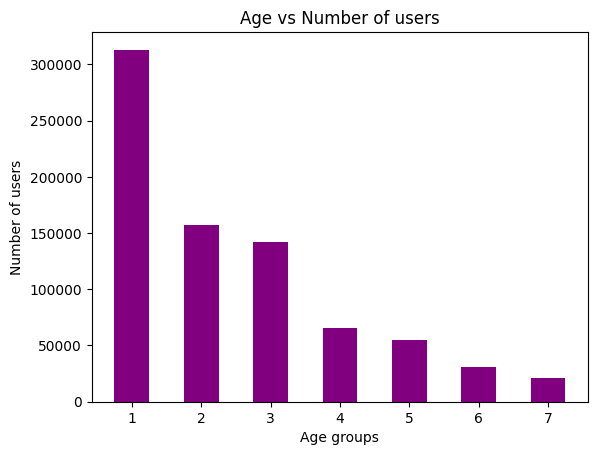

In [95]:
plt.bar(df['Age'].value_counts().index, df['Age'].value_counts().values, color='purple', width=0.5)
plt.xlabel('Age groups')
plt.ylabel('Number of users')
plt.title('Age vs Number of users')
plt.show()